In [ ]:
# 查看当前kernel下已安装的包  list packages
!pip list --format=columns

In [1]:
# 这一句必须要有，要不然的话，项目不认识接下来的 np 是什么意思
# 一般的项目中，numpy 简称为 np，pandas 简称为 pd

import numpy as np

![QcwYOj](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/QcwYOj.jpg)

NumPy是Python的最重要的扩展程序库之一，也是入门机器学习编程的必备工具。然而对初学者来说，NumPy的大量运算方法非常难记。

最近，国外有位程序员讲NumPy的基本运算以图解的方式写下来，让学习过程变得轻松有趣。

![V8yceg](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/V8yceg.jpg)

下面就让我们跟随他的教程一起来学习吧！

教程内容分为`向量 （一维数组）`、`矩阵 （二维数组）`、`三维与更高维数组`3个部分。

## 1. Numpy数组与Python列表

在介绍正式内容之前，先让我们先来了解一下Numpy数组与Python列表的区别。

乍一看，NumPy数组类似于Python列表。它们都可以用作容器，具有获取（getting）和设置（setting）元素以及插入和移除元素的功能。

两者有很多相似之处，以下是二者在运算时的一个示例：

![Bb8IJc](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/Bb8IJc.jpg)

In [17]:
a = [1,2,3]
[q*2 for q in a]

[2, 4, 6]

In [18]:
a = np.array([1,2,3])
a * 2

array([2, 4, 6])

In [19]:
a=[1,2,3]
b=[4,5,6]
[q+r for q,r in zip(a,b)]

[5, 7, 9]

In [20]:
zip(a,b)

In [21]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a+b

array([5, 7, 9])

和Python列表相比，Numpy数组具有以下特点：

* 更紧凑，尤其是在一维以上的维度；
* 向量化操作时比Python列表快，但在末尾添加元素比Python列表慢。

![FYK4k3](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/FYK4k3.jpg)

> 在末尾添加元素时，Python列表复杂度为O(1)，NumPy复杂度为O(N)

## 2. 向量运算

### 2.1 向量初始化

创建NumPy数组的一种方法是从Python列表直接转换，数组元素的类型与列表元素类型相同。

![qVUtC6](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/qVUtC6.jpg)

NumPy数组无法像Python列表那样加长，因为在数组末尾没有保留空间。

因此，常见的做法是定义一个Python列表，对它进行操作，然后再转换为NumPy数组，或者用np.zeros和np.empty初始化数组，预分配必要的空间：

![EcbBFa](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/EcbBFa.jpg)

In [22]:
a = np.array([1.,2.,3.])

a.dtype

dtype('float64')

In [23]:
a.shape

(3,)

有时我们需要创建一个空数组，大小和元素类型与现有数组相同：

![94gElZ](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/94gElZ.jpg)

In [24]:
c = np.zeros_like(a)
c.dtype

dtype('float64')

In [25]:
c.shape

(3,)

实际上，所有用常量填充创建的数组的函数都有一个_like对应项，来创建相同类型的常数数组：

>  注意，like 的是形状

![zdEqXO](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/zdEqXO.jpg)

在NumPy中，可以用arange或者linspace来初始化单调序列数组：
![Q5r4pa](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/Q5r4pa.jpg)

In [26]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [27]:
np.arange(2,6)

array([2, 3, 4, 5])

In [28]:
np.arange(1,6,2)

array([1, 3, 5])

In [29]:
np.linspace(0,0.5,6)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

如果需要类似[0., 1., 2.]的浮点数组，可以更改arange输出的类型：arange(3).astype(float)。

但是有更好的方法：arange函数对数据类型敏感，如果将整数作为参数，生成整数数组；如果输入浮点数（例如arange(3.)），则生成浮点数组。

但是arange在处理浮点数方面并不是特别擅长：

![M5zskW](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/M5zskW.jpg)

In [32]:
np.linspace(0,1,20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [2]:
np.linspace(0,1,?)

SyntaxError: invalid syntax (<ipython-input-2-fc0946c42ca3>, line 1)

In [3]:
np.linspace(0,1,100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

出于测试目的，通常需要生成随机数组，NumPy提供随机整数、均匀分布、正态分布等几种随机数形式：

![IQ5t5R](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/IQ5t5R.jpg)

In [36]:
np.random.randint(0,10,3)

array([1, 1, 0])

In [38]:
import random
random.randint(0,10)

3

In [39]:
np.random.rand(3)

array([0.30553575, 0.26924636, 0.23406872])

In [40]:
np.random.randn(3)

array([0.10773836, 0.73236452, 1.07777256])

In [41]:
np.random.uniform(1,10,3)

array([7.91645824, 5.02084829, 3.22766634])

In [43]:
np.random.normal(5,2,3)

array([5.34349346, 8.09668328, 7.05348693])

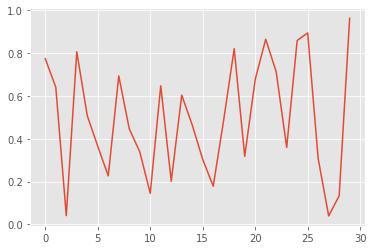

In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.plot(np.random.rand(30))
plt.show()

从np.random.normal()到正态分布的拟合

先看伟大的高斯分布（Gaussian Distribution）的概率密度函数（probability density function）：

![RM3FTU](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/RM3FTU.png)

对应于numpy中：

```python

numpy.random.normal(loc=0.0, scale=1.0, size=None)

```

参数的意义为：

```
loc：float
    此概率分布的均值（对应着整个分布的中心centre）
scale：float
    此概率分布的标准差（对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高）
size：int or tuple of ints
    输出的shape，默认为None，只输出一个值
    
```

我们更经常会用到的np.random.randn(size)所谓标准正态分布（μ=0,σ=1），对应于np.random.normal(loc=0, scale=1, size)。




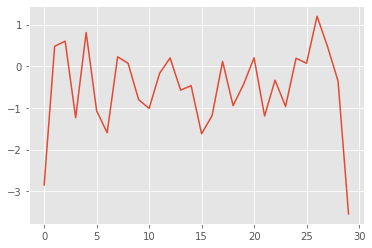

In [6]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.plot(np.random.randn(30))
plt.show()

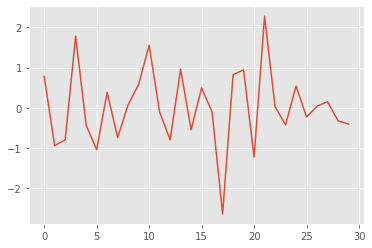

In [9]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.plot(np.random.normal(loc=0, scale=1, size=30))
plt.show()

### 采样（sampling）

In [ ]:
# 从某一分布（由均值和标准差标识）中获得样本
mu, sigma = 0, .1
s = np.random.normal(loc=mu, scale=sigma, size=1000)
s

### 校验均值和方差：

In [11]:
# mu = 0
# np.mean(s) 均值
abs(mu < np.mean(s)) < .01

False

In [52]:
abs(sigma-np.std(s, ddof=1)) < .01
# ddof，delta degrees of freedom，表示自由度
# 一般取1，表示无偏估计， 

True

### 拟合

我们看使用matplotlib.pyplot便捷而强大的语法如何进行高斯分布的拟合：

TypeError: 'lw' is an invalid keyword to ufunc 'exp'

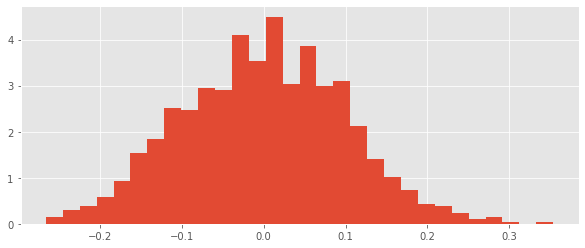

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 4

# count, bins, _ = plt.hist(s, bins=30, normed=True)
# 解决方法
# 原因是这个库更新了，已经没有这个属性了。把代码中的 normed 删掉（不报错了，不过好像画不出来了）
count, bins, _ = plt.hist(s, bins=30, density=True,stacked=True)

# normed是进行拟合的关键
# count统计某一bin出现的次数，在Normed为True时，可能其值会略有不同

plt.plot(bins, 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-(bins-mu)**2/(2*sigma**2), lw=2, c='r'))
plt.show()

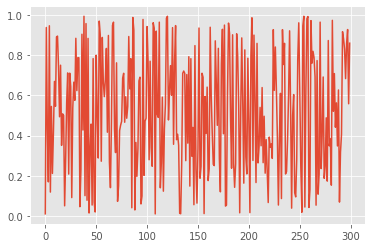

In [47]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

series=Series(np.random.rand(300))
series.plot()
plt.show()

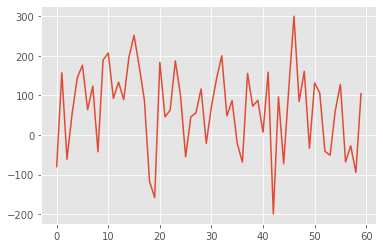

In [48]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

series=Series(np.random.normal(50,100,60))
series.plot()
plt.show()

### 向量索引

一旦将数据存储在数组中，NumPy便会提供简单的方法将其取出：

![pvrlh3](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/pvrlh3.jpg)

In [70]:
a = np.arange(1,6)
a

array([1, 2, 3, 4, 5])

In [71]:
a[1]

2

In [72]:
a[2:4]

array([3, 4])

In [73]:
a[-2:]

array([4, 5])

In [74]:
a[::2]

array([1, 3, 5])

In [75]:
a[[1,3,4]]

array([2, 4, 5])

In [76]:
a[2:4] = 0
a

array([1, 2, 0, 0, 5])

上面展示了各式各样的索引，例如取出某个特定区间，从右往左索引、只取出奇数位等等。

但它们都是所谓的view，也就是不存储原始数据。并且如果原始数组在被索引后进行更改，则不会反映原始数组的改变。

这些索引方法允许分配修改原始数组的内容，因此需要特别注意：只有下面最后一种方法才是复制数组，如果用其他方法都可能破坏原始数据：

![sQogqW](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/sQogqW.jpg)

从NumPy数组中获取数据的另一种超级有用的方法是布尔索引，它允许使用各种逻辑运算符，来检索符合条件的元素：

![bNw2ac](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/bNw2ac.jpg)

注意：Python中的三元比较3<=a<=5在NumPy数组中不起作用。

如上所述，布尔索引也会改写数组。它有两个常见的函数，分别是np.where和np.clip：

![xCjemv](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/xCjemv.jpg)

### 向量运算

算术运算是NumPy速度最引入注目的地方之一。NumPy的向量运算符已达到C++级别，避免了Python的慢循环。

NumPy允许像普通数字一样操作整个数组（加减乘除、整除、幂）：

![rGPcxb](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/rGPcxb.jpg)

> 和Python中一样，a//b表示div b（整除），x**n表示xⁿ

向量还可以与标量进行类似的运算，方法相同：

![vQCvov](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/vQCvov.jpg)

大多数的数学函数都有NumPy对应项用于处理向量：

![IekcAX](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/IekcAX.jpg)

向量的点积、叉积也有运算符：

![SPl3BA](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/SPl3BA.jpg)

![lIfWOp](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/lIfWOp.jpg)

![sFDAcF](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/sFDAcF.jpg)

a和b的点积公式为：

![VmTj4f](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/VmTj4f.jpg)

两个向量的叉乘，又叫向量积、外积、叉积，叉乘的运算结果是一个向量而不是一个标量。并且两个向量的叉积与这两个向量组成的坐标平面垂直。

对于向量a和向量b：

![M339Ia](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/M339Ia.jpg)

a和b的叉乘公式为：

![jsEtAV](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/jsEtAV.jpg)



![R0iic9](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/R0iic9.jpg)

我们也可以进行三角函数、反三角函数、求斜边运算：

![ckqK9p](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/ckqK9p.jpg)

数组可以四舍五入为整数：

![2JhPrH](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/2JhPrH.jpg)

NumPy还可以执行以下基本的统计运算（最大最小值、平均值、方差、标准差）：

![tTWSxh](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/tTWSxh.jpg)

不过排序函数的功能比Python列表对应函数更少：

![QByM8B](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/QByM8B.jpg)

### 搜索向量中的元素

与Python列表相反，NumPy数组没有index方法。

![MCQxik](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/MCQxik.jpg)

* 查找元素的一种方法是np.where(a==x)[0][0]，它既不优雅也不快速，因为要查找的项需要从开头遍历数组的所有元素。

* 更快的方式是通过Numba中的next((i[0] for i, v in np.ndenumerate(a) if v==x), -1)来加速。

* 一旦对数组进行排序，情况就会变得更好：v = np.searchsorted(a, x); return v if a[v]==x else -1的复杂度为O(log N)，确实非常快，但是首先需要O(N log N)的排序时间。

### 比较浮点数

函数np.allclose(a, b)用于比较具有给定公差的浮点数组：

![yf767T](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/yf767T.jpg)

* np.allclose假设所有的比较数字的等级是1个单位。例如在上图中，它就认为1e-9和2e-9相同，如果要进行更细致的比较，需要通过atol指定比较等级1：np.allclose(1e-9, 2e-9, atol=1e-17) == False。

* math.isclose进行比较没有假设前提，而是基于用户给出的一个合理abs_tol值：math.isclose(0.1+0.2–0.3, abs_tol=1e-8) == True。

除此之外np.allclose在绝对和相对公差公式中还存在一些小问题，例如，对某些数存在allclose(a, b) != allclose(b, a)。这些问题已在math.isclose函数中得到解决。

### 矩阵运算

NumPy中曾经有一个专用的类matrix，但现在已弃用，因此下面将交替使用矩阵和2D数组两个词。

矩阵初始化语法与向量相似：

![3ub4C1](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/3ub4C1.jpg)

这里需要双括号，因为第二个位置参数是为dtype保留的。

随机矩阵的生成也类似于向量的生成：

![lE7ceP](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/lE7ceP.jpg)

二维索引语法比嵌套列表更方便：

![GehyDu](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/GehyDu.jpg)

和一维数组一样，上图的view表示，切片数组实际上并未进行任何复制。修改数组后，更改也将反映在切片中。

### axis参数

在许多操作（例如求和）中，我们需要告诉NumPy是否要跨行或跨列进行操作。为了使用任意维数的通用表示法，NumPy引入了axis的概念：axis参数实际上是所讨论索引的数量：第一个索引是axis=0，第二个索引是axis=1，等等。

因此在二维数组中，如果axis=0是按列，那么axis=1就是按行。


![b2Sqyx](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/b2Sqyx.jpg)

In [13]:
a = np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
a.sum()

21

In [15]:
a.sum(axis=0)

array([5, 7, 9])

In [16]:
np.round(2.5)

2.0

In [17]:
np.round(1.5)

2.0

原因：
从统计学的角度，“奇进偶舍”比“四舍五入”更为精确：在大量运算时，因为舍入后的结果有的变大，有的变小，可使舍入后的结果误差均值趋于零。而不是像四舍五入那样逢五就进位，导致结果偏向大数，使得误差产生积累进而产生系统误差。

### 矩阵运算

除了普通的运算符（如+，-，*，/，//和**）以元素方式计算外，还有一个@运算符可计算矩阵乘积：

![Oe9z6W](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/Oe9z6W.jpg)

在第一部分中，我们已经看到向量乘积的运算，NumPy允许向量和矩阵之间，甚至两个向量之间进行元素的混合运算：

![TlDlf9](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/TlDlf9.jpg)


### 行向量与列向量

从上面的示例可以看出，在二维数组中，行向量和列向量被不同地对待。

默认情况下，一维数组在二维操作中被视为行向量。因此，将矩阵乘以行向量时，可以使用(n，)或(1，n)，结果将相同。

如果需要列向量，则有转置方法对其进行操作：

![DbFVpk](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/DbFVpk.jpg)

能够从一维数组中生成二位数组列向量的两个操作是使用命令reshape重排和newaxis建立新索引：

![VPyQ47](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/VPyQ47.jpg)


这里的-1参数表示reshape自动计算第二个维度上的数组长度，None在方括号中充当np.newaxis的快捷方式，该快捷方式在指定位置添加了一个空axis。

因此，NumPy中总共有三种类型的向量：一维数组，二维行向量和二维列向量。这是两者之间显式转换的示意图：

![Z55O17](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/Z55O17.jpg)


根据规则，一维数组被隐式解释为二维行向量，因此通常不必在这两个数组之间进行转换，相应区域用灰色标出。

### 矩阵操作

连接矩阵有两个主要函数：

![gPrPfd](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/gPrPfd.jpg)


这两个函数只堆叠矩阵或只堆叠向量时，都可以正常工作。但是当涉及一维数组与矩阵之间的混合堆叠时，vstack可以正常工作：hstack会出现尺寸不匹配错误。

因为如上所述，一维数组被解释为行向量，而不是列向量。解决方法是将其转换为列向量，或者使用column_stack自动执行：

![8hd3Hb](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/8hd3Hb.jpg)

堆叠的逆向操作是分裂：

![DwgOjy](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/DwgOjy.jpg)

矩阵可以通过两种方式完成复制：tile类似于复制粘贴，repeat类似于分页打印。

![QrzrMx](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/QrzrMx.jpg)

特定的列和行可以用delete进行删除：

![AMGzCA](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/AMGzCA.jpg)


逆运算为插入：

![xM5YWs](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/xM5YWs.jpg)

append就像hstack一样，该函数无法自动转置一维数组，因此再次需要对向量进行转置或添加长度，或者使用column_stack代替：

![SZHD2e](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/SZHD2e.jpg)

实际上，如果我们需要做的就是向数组的边界添加常量值，那么pad函数就足够了：

![3ZhErt](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/3ZhErt.jpg)

### Meshgrid

如果我们要创建以下矩阵：

![Uobcsb](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/Uobcsb.jpg)

两种方法都很慢，因为它们使用的是Python循环。在MATLAB处理这类问题的方法是创建一个meshgrid：

![YIuydA](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/YIuydA.jpg)

该meshgrid函数接受任意一组索引，mgrid仅是切片，indices只能生成完整的索引范围。fromfunction如上所述，仅使用I和J参数一次调用提供的函数。

但是实际上，在NumPy中有一种更好的方法。无需在整个矩阵上耗费存储空间。仅存储大小正确的矢量就足够了，运算规则将处理其余的内容：

![F2M1Ly](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/F2M1Ly.jpg)

在没有indexing=’ij’参数的情况下，meshgrid将更改参数的顺序：J, I= np.meshgrid(j, i)—这是一种“ xy”模式，用于可视化3D图。

除了在二维或三维数组上初始化外，meshgrid还可以用于索引数组：

![Wtmp5k](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/Wtmp5k.jpg)

就像之前提到的统计函数一样，二维数组接受到axis参数后，会采取相应的统计运算：

![LLWQgY](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/LLWQgY.jpg)

二维及更高维度中，argmin和argmax函数返回最大最小值的索引：

![ShkUrY](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/ShkUrY.jpg)

all和any两个函数也能使用axis参数：

![b07IbQ](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/b07IbQ.jpg)

### 矩阵排序

尽管axis参数对上面列出的函数很有用，但对二维排序却没有帮助：

![w0f4XE](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/w0f4XE.jpg)

axis绝不是Python列表key参数的替代。不过NumPy具有多个函数，允许按列进行排序：

1、按第一列对数组排序：a[a[:,0].argsort()]

![tdbJ1G](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/tdbJ1G.jpg)

argsort排序后，此处返回原始数组的索引数组。

此技巧可以重复，但是必须小心，以免下一个排序混淆前一个排序的结果：

```python
a = a[a[:,2].argsort()]
a = a[a[:,1].argsort(kind=’stable’)]
a = a[a[:,0].argsort(kind=’stable’)]
```

![aTg2Lj](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/aTg2Lj.jpg)

2、有一个辅助函数lexsort，该函数按上述方式对所有可用列进行排序，但始终按行执行，例如：

* a[np.lexsort(np.flipud(a[2,5].T))]：先通过第2列排序，再通过第5列排序；

* a[np.lexsort(np.flipud(a.T))]：按从左到右所有列依次进行排序。

![1vxUk6](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/1vxUk6.jpg)

3、还有一个参数order，但是如果从普通（非结构化）数组开始，则既不快速也不容易使用。

4、因为这个特殊的操作方式更具可读性和它可能是一个更好的选择，这样做的pandas不易出错：

* pd.DataFrame(a).sort_values(by=[2,5]).to_numpy()：通过第2列再通过第5列进行排序。

* pd.DataFrame(a).sort_values().to_numpy()：通过从左向右所有列进行排序


### 高维数组运算

通过重排一维向量或转换嵌套的Python列表来创建3D数组时，索引的含义为（z，y，x）。

第一个索引是平面的编号，然后才是在该平面上的移动：

![Qqn6i5](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/Qqn6i5.jpg)

这种索引顺序很方便，例如用于保留一堆灰度图像：这a[i]是引用第i个图像的快捷方式。

但是此索引顺序不是通用的。处理RGB图像时，通常使用（y，x，z）顺序：前两个是像素坐标，最后一个是颜色坐标（Matplotlib中是RGB ，OpenCV中是BGR ）：

![4fisgo](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/4fisgo.jpg)

这样，可以方便地引用特定像素：a[i,j]给出像素的RGB元组(i,j)。

因此，创建特定几何形状的实际命令取决于正在处理的域的约定：

![ql6sX1](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/ql6sX1.jpg)

显然，NumPy函数像hstack、vstack或dstack不知道这些约定。其中硬编码的索引顺序是（y，x，z），RGB图像顺序是：

![YqySZ5](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/YqySZ5.jpg)

如果数据的布局不同，则使用concatenate命令堆叠图像，并在axis参数中提供显式索引数会更方便：

![rwnQVg](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/rwnQVg.jpg)

如果不方便使用axis，可以将数组转换硬编码为hstack的形式：

![eP1HWw](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/eP1HWw.jpg)

这种转换没有实际的复制发生。它只是混合索引的顺序。

混合索引顺序的另一个操作是数组转置。检查它可能会让我们对三维数组更加熟悉。

根据我们决定的axis顺序，转置数组所有平面的实际命令将有所不同：对于通用数组，它交换索引1和2，对于RGB图像，它交换0和1：

![kcoMyH](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/kcoMyH.jpg)

有趣的是，（和唯一的操作模式）默认的axes参数颠倒了索引顺序，这与上述两个索引顺序约定都不相符。

最后，还有一个函数，可以在处理多维数组时节省很多Python循环，并使代码更简洁，这就是爱因斯坦求和函数einsum：

![gBUEXP](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/gBUEXP.jpg)

它将沿重复索引的数组求和。

最后，若要掌握NumPy，可以前去GitHub上的项目——100道NumPy练习题，验证自己的学习成果。